In [26]:
from fastai.vision import *
from fastai.metrics import error_rate 

In [27]:
## z = wx + b
## n number of rows
n = 50
## m number of columns 
m = 2

w = torch.ones(n,m)
b = torch.ones(n)
x = tensor(3., 2)
w[:5], b[:5], x

(tensor([[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]]), tensor([1., 1., 1., 1., 1.]), tensor([3., 2.]))

In [28]:
w[:,0].uniform_(-1., 1)
b.uniform_(-1., 1)
w[:5], b[:5]

(tensor([[ 0.9951,  1.0000],
         [-0.0124,  1.0000],
         [ 0.4208,  1.0000],
         [ 0.0080,  1.0000],
         [-0.7864,  1.0000]]),
 tensor([-0.2424,  0.9915,  0.7188, -0.7910,  0.7701]))

In [29]:
y = w@x + b
y[:5]

tensor([4.7428, 2.9543, 3.9813, 1.2329, 0.4108])

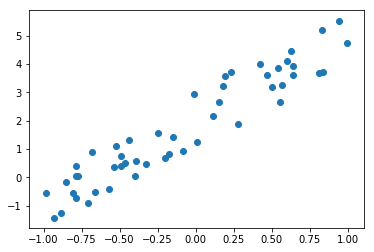

In [30]:
plt.scatter(w[:,0], y);

### Gradient Descent - find **x** such that you minimize the error between points and __w@x__(mse-loss function)

In [31]:
def mse(y_hat, y):
    return ((y_hat - y)**2).mean()

x = tensor(-1., -2)
y_hat = w@x

x, y[:5]

(tensor([-1., -2.]), tensor([4.7428, 2.9543, 3.9813, 1.2329, 0.4108]))

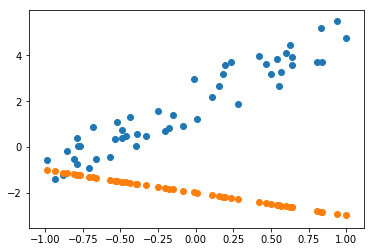

In [32]:
plt.scatter(w[:,0], y)
plt.scatter(w[:,0], y_hat);

In [33]:
mse(y_hat, y)

tensor(19.2446)

In [34]:
x = nn.Parameter(x)
x

Parameter containing:
tensor([-1., -2.], requires_grad=True)

In [35]:
def update():
    y_hat = w@x
    loss = mse(y_hat, y)
    if t % 10 == 0:
        print(loss, x)
    loss.backward()
    with torch.no_grad():
        x.sub_(lr * x.grad)
        x.grad.zero_()

x.sub_() - https://discuss.pytorch.org/t/what-is-in-place-operation/16244

In [36]:
lr = 1e-1
for t in range(100):
    update()

tensor(19.2446, grad_fn=<MeanBackward1>) Parameter containing:
tensor([-1., -2.], requires_grad=True)
tensor(2.1482, grad_fn=<MeanBackward1>) Parameter containing:
tensor([0.8704, 1.3482], requires_grad=True)
tensor(0.7600, grad_fn=<MeanBackward1>) Parameter containing:
tensor([1.9411, 1.8058], requires_grad=True)
tensor(0.4515, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.4856, 1.9066], requires_grad=True)
tensor(0.3765, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.7563, 1.9433], requires_grad=True)
tensor(0.3582, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.8902, 1.9600], requires_grad=True)
tensor(0.3537, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.9564, 1.9682], requires_grad=True)
tensor(0.3526, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.9892, 1.9722], requires_grad=True)
tensor(0.3524, grad_fn=<MeanBackward1>) Parameter containing:
tensor([3.0054, 1.9741], requires_grad=True)
tensor(0.3523, grad_fn=<MeanBackward1>) Pa

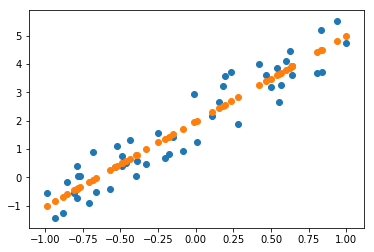

In [37]:
y_hat = w@x

plt.scatter(w[:,0],y)
plt.scatter(w[:,0], y_hat);